In [18]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,        # using this for reading table, panda dont need it
    database = "sql_intro"
)

# auth_plugin is needed, can check by commends 
# SELECT user,authentication_string,plugin,host FROM mysql.user;
# check the columns plugin and user


print(mydb)


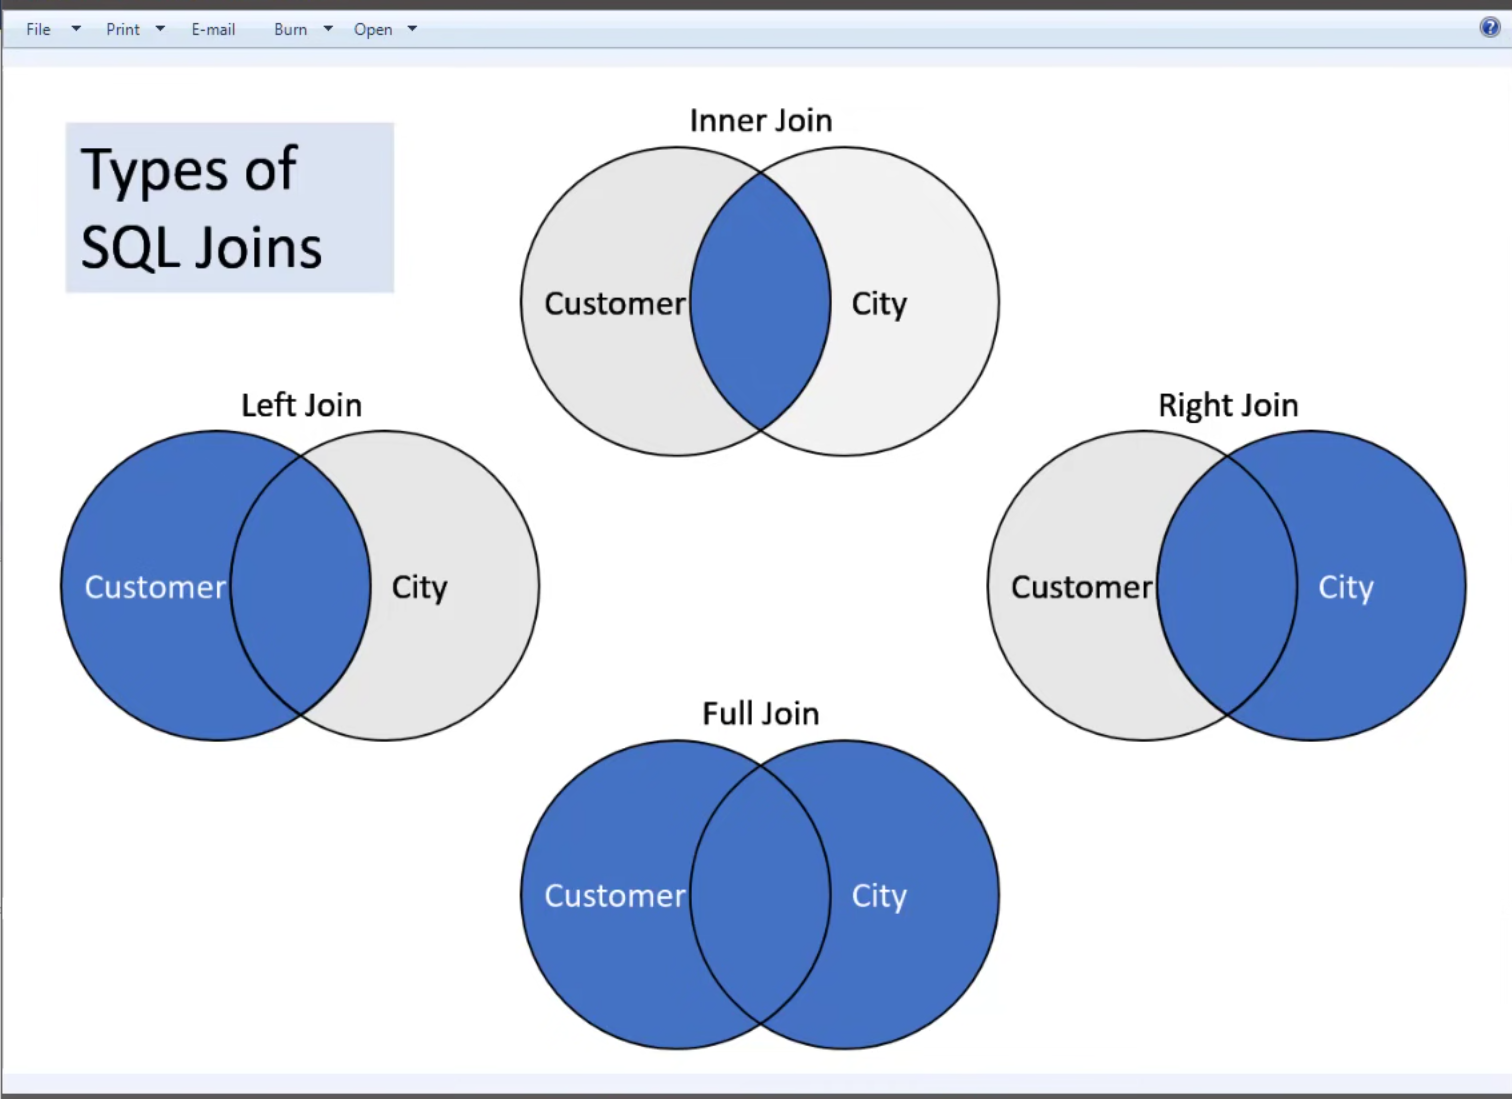

In [5]:
from IPython.display import Image
Image("/home/bruce/Pictures/Screenshots/0001.png")

In [22]:

# select * from Customer;

# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston

#! both have the same column "cityId" must use that commn column for joint

##### left outer join = left join
##### right outer join = right join


In [23]:
# sample code for inner joint
# only get the staffs that matches
sql_query = """
select * 
from Customer 
Inner Join City
on Customer.CityId = City.CityId;
"""

# select *
# from Customer as cs
# inner Join City as cy
# on cs.CityId = cy.CityId


df = pd.read_sql_query(
    sql_query,
    mydb)

df
#? the common column will come out twice


/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityId,CityName
0,1,1,Bob Smith,1,Kansas City
1,2,1,Sally Smith,1,Kansas City
2,3,2,Tom Smith,2,New York


# inner join

In [24]:
# select * from Customer;

# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston



# get rid of extra common column of 2 tables
sql_query ="""
SELECT cu.*, ci.CityName
FROM Customer as cu
INNER JOIN City as ci
ON cu.CityId = ci.CityId;
"""

df = pd.read_sql_query(
    sql_query,
    mydb
)
df


/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityName
0,1,1,Bob Smith,Kansas City
1,2,1,Sally Smith,Kansas City
2,3,2,Tom Smith,New York


In [25]:

#? use using to indicate common column of 2 or more tables


sql_query ="""
SELECT *
FROM Customer as cu
INNER JOIN City as ci
USING (CityId)
"""

df = pd.read_sql_query(
    sql_query,
    mydb
)
df


/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CityId,CustomerId,Customer_Name,CityName
0,1,1,Bob Smith,Kansas City
1,1,2,Sally Smith,Kansas City
2,2,3,Tom Smith,New York


# left (outer) join

In [26]:
# select * from Customer;

# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston

#! column CityId will got 2
sql_query = """
SELECT *
FROM Customer as cu
LEFT OUTER JOIN City as ci
ON cu.CityId = ci.CityId;
"""
df = pd.read_sql_query(
    sql_query,
    mydb)

df


#! get rid of extra common column
# SELECT cu.* , ci.CityName
# FROM Customer as cu
# LEFT OUTER JOIN City as ci
# ON cu.CityId = ci.CityId


/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityId,CityName
0,1,1.0,Bob Smith,1.0,Kansas City
1,2,1.0,Sally Smith,1.0,Kansas City
2,3,2.0,Tom Smith,2.0,New York
3,4,NaN,Mary Smith,NaN,None


In [29]:


#? use using instead of on for indicating common column of tables

sql_query = """
SELECT cu.* , ci.CityName
FROM Customer as cu
LEFT OUTER JOIN City as ci
USING (CityiD)
"""
df = pd.read_sql_query(
    sql_query,
    mydb)

df

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityName
0,1,1.0,Bob Smith,Kansas City
1,2,1.0,Sally Smith,Kansas City
2,3,2.0,Tom Smith,New York
3,4,NaN,Mary Smith,None


# right (outer) join

In [ ]:
# select * from Customer;

# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston

sql_query = """
SELECT *
FROM Customer as cu
RIGHT JOIN City as ci
ON cu.CityId = ci.CityId;
"""

table_content = pd.read_sql_query(
    sql_query,
    mydb
)

table_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityId,CityName
0,2.0,1.0,Sally Smith,1,Kansas City
1,1.0,1.0,Bob Smith,1,Kansas City
2,3.0,2.0,Tom Smith,2,New York
3,NaN,NaN,None,3,Houston


In [30]:

#? USING
sql_query = """
SELECT *
FROM Customer as cu
RIGHT JOIN City as ci
USING (CityId);
"""

table_content = pd.read_sql_query(
    sql_query,
    mydb
)

table_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CityId,CityName,CustomerId,Customer_Name
0,1,Kansas City,2.0,Sally Smith
1,1,Kansas City,1.0,Bob Smith
2,2,New York,3.0,Tom Smith
3,3,Houston,NaN,None


# join three tables
```
SELECT *
  FROM table1
  INNER JOIN table2
  ON table1.id = table2.id
  INNER JOIN table3
  ON table2.id = table3.id;
```

In [ ]:
# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston


#! in left join Tom Smith should get pick up the City Name
#! But Tom Smith wont get pick up the City Name
#! its because on  cs.CityId = cy.CityId and cy.CityName = "Kansas City"
                                                                            # we filter out the city name here so
                                                                            # it will filter the table first before join
sql_query="""
select cs.*, cy.CityName
from Customer as cs
left join City as cy
on  cs.CityId = cy.CityId and cy.CityName = "Kansas City"
"""

pd_data_content = pd.read_sql_query(
    sql_query,
    mydb
)
pd_data_content



/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityName
0,1,1.0,Bob Smith,Kansas City
1,2,1.0,Sally Smith,Kansas City
2,3,2.0,Tom Smith,None
3,4,NaN,Mary Smith,None


# example of using AND to set filter

In [ ]:
# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston

# usual left result
# CustomerId	CityId	Customer_Name	CityId	CityName
# 0	1	1.0	Bob Smith	1.0	Kansas City
# 1	2	1.0	Sally Smith	1.0	Kansas City
# 2	3	2.0	Tom Smith	2.0	New York
# 3	4	NaN	Mary Smith	NaN	None


#? example of using where to set filter

sql_query="""
SELECT cu.*, ci.CityName
FROM Customer as cu
LEFT JOIN City as ci
ON cu.CityId = ci.CityId
WHERE ci.CityName = "Kansas City"    #! setting filter here by where
"""

pd_data_content = pd.read_sql_query(
    sql_query,
    mydb
)
pd_data_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityName
0,1,1,Bob Smith,Kansas City
1,2,1,Sally Smith,Kansas City


In [ ]:

#? same left join as above but using AND to set filter

sql_query="""
select cs.*, cy.CityName
from Customer as cs
inner join City as cy
on  
cs.CityId = cy.CityId 
and  #! setting filter here by using and so only Kansas City will come out
cy.CityName = "Kansas City"
"""  

pd_data_content = pd.read_sql_query(
    sql_query,
    mydb
)
pd_data_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityName
0,1,1,Bob Smith,Kansas City
1,2,1,Sally Smith,Kansas City


In [ ]:
# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston
#! trying on inner join
sql_query="""
SELECT cu.*, ci.CityName
FROM Customer as cu
LEFT JOIN City as ci
ON 
cu.CityId = ci.CityId AND ci.CityName = "Kansas City";
"""  
# where ci.CityName = "Kansas City";
# AND ci.CityName = "Kansas City";

pd_data_content = pd.read_sql_query(
    sql_query,
    mydb
)
pd_data_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityName
0,1,1.0,Bob Smith,Kansas City
1,2,1.0,Sally Smith,Kansas City
2,3,2.0,Tom Smith,None
3,4,NaN,Mary Smith,None


# use where instead of on, also can BE USE ON INNER JOIN ONLY
# LEFT , RIGHT JOIN CANT
###### inner join sec_table_name on first_table_name.common_column_name = sec_table_name.common_column_name

In [ ]:

# CustomerId	CityId	Customer_Name
# 1	                        1	          Bob Smith
# 2	                        1	          Sally Smith
# 3	                        2	          Tom Smith
# 4	                        null	    Mary Smith
 

# select * from City;

# CityId	CityName
# 1	            Kansas City
# 2	            New York
# 3	            Houston

#! using where instead on
sql_query = """
SELECT *
FROM Customer AS cu
INNER JOIN City AS ci
WHERE cu.CityId = ci.CityId;
"""#! LEFT , RIGHT JOIN CANT USE WHERE

pd_data_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_data_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,CityId,Customer_Name,CityId,CityName
0,1,1,Bob Smith,1,Kansas City
1,2,1,Sally Smith,1,Kansas City
2,3,2,Tom Smith,2,New York


# practice from academic ai

In [10]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,          # using this for reading table, panda dont need it
    #multi=True,                 # if wanna use mulitple query
    database = "sql_fr_ai"
)

# LEFT JOIN daily_amount and weather


mycoursor = mydb.cursor()
mycoursor.execute(
    """
    CREATE VIEW datamart AS 
    SELECT 
        da.*,
        we.avetemp,
        we.totprecip
    FROM 
        daily_amount as da
    LEFT JOIN 
        weather as we
    ON 
        da.date_ymd = we.date_ymd
    """
)





# table daily_amount 
# date_ymd	amount_day

# table  weather
# date_ymd	weekday	avetemp	totprecip